<a href="https://colab.research.google.com/github/y001003/yeardream/blob/main/DL/%EB%B0%91%EB%B0%94%EB%8B%A5%EB%B6%80%ED%84%B0_%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94_%EB%94%A5%EB%9F%AC%EB%8B%9D_2%EC%9E%A5_%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 밑바닥부터 시작하는 딥러닝
https://compmath.korea.ac.kr/appmath2021/Perceptron.html

밑바닥부터 시작하는 딥러닝

딥 러닝을 이용한 자연어 처리 입문
https://wikidocs.net/24958


## 2장 퍼셉트론(단순 퍼셉트론)

### 2.1.1 퍼셉트론이란

**퍼셉트론**이란 다수의 신호를 입력으로 받아 하나의 신호를 출력하는 구조이다.  
신호는 흐른다(1), 안 흐른다(0) 두가지 값을 가지게 된다.


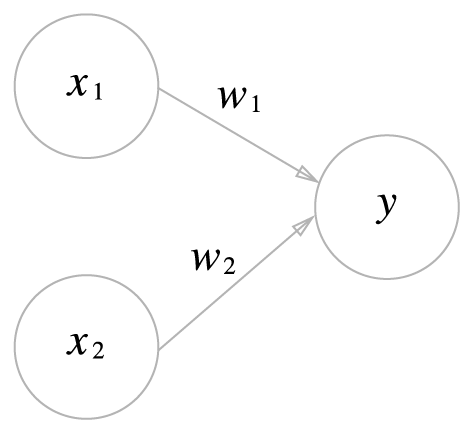

#### 2.1.2 가중치와 편향

입력층 : $ x_1, x_2$

출력층 : $ y$

가중치 : $ w_1, w_2$

원을 뉴런 또는 노드라고 부른다. **입력층**에서 받은 신호를 노드에 보낼때 각각 **가중치**(w)를 곱해져서 보내진다. **출력층**에서는 받은 신호들의 총합이 정해진 **한계**를 넘어설 때만 1을 출력한다.

이 한계를 **임계값**이라 부르며, 𝛳 세타(theta)라고 부른다.
$$
f(n)=
\begin{cases}
0 & \mbox{if }(w_1x_1 + w_2x_2) \leq 𝛳 \\
1 & \mbox{if }(w_1x_1 + w_2x_2) > 𝛳
\end{cases}
$$

가중치가 클수록 해당 신호가 그만큼 더 중요하다는 의미가 된다.  
임계값은 뉴런이 얼마나 쉽게 활성화(결과로 1을 출력)하느냐를 조정하는 매개변수이다.

위의 식에서  𝛳 세타를 $-b$로 치환하면 아래의 식으로 바꿀수 있다.

$$
f(n)=
\begin{cases}
0 & \mbox{if }(b + w_1x_1 + w_2x_2) \leq 0 \\
1 & \mbox{if }(b + w_1x_1 + w_2x_2) > 0
\end{cases}
$$
편향(bias) : $b$

바뀐 식을 해석해보자면 퍼셉트론은 입력신호에 가중치를 곱한값과 편향을 함쳐서, 그 값이 0을 넘으면 1을 출력하고 0보다 낮으면 0을 출력한다.

### 2.2 단순한 논리 회로

진리표 : 입력신호와 출력신호의 대응 표

AND, NAND, OR, XOR 게이트 모두 퍼셉트론의 구조는 동일한채로 매개변수인 **가중치($w$)와 임계치(𝛳)를 적절히 조정**함으로써 구현할 수 있다.

#### 2.2.1 AND 게이트

입력값$x_1, x_2$에 둘다 1을 받아야 출력층에 1을 출력하는 논리회로

|$x_1$|$x_2$|$y$|
|------|------|------|
|0|0|0|
|1|0|0|
|0|1|0|
|1|1|1|

In [ ]:
def AND(x1, x2):
    w1,w2,theta = 0.5, 0.5, 0.7

    if w1*x1 + w2*x2 > theta:
        return 1
    elif w1*x1 + w2*x2 <= theta:
        return 0

        
print('입력 x1: 0  x2: 0,| 출력 y: %d' %AND(0,0))
print('입력 x1: 1  x2: 0,| 출력 y: %d' %AND(1,0))
print('입력 x1: 0  x2: 1,| 출력 y: %d' %AND(0,1))
print('입력 x1: 1  x2: 1,| 출력 y: %d' %AND(1,1))

입력 x1: 0  x2: 0,| 출력 y: 0
입력 x1: 1  x2: 0,| 출력 y: 0
입력 x1: 0  x2: 1,| 출력 y: 0
입력 x1: 1  x2: 1,| 출력 y: 1


편향 -b 를 넣은 식의 코드화

In [14]:
import numpy as np

In [15]:
def And(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.7

    if np.sum(x*w) + b > 0:
        return 1
    elif np.sum(x*w) + b <= 0:
        return 0

print('입력 x1: 0  x2: 0,| 출력 y: %d' %And(0,0))
print('입력 x1: 1  x2: 0,| 출력 y: %d' %And(1,0))
print('입력 x1: 0  x2: 1,| 출력 y: %d' %And(0,1))
print('입력 x1: 1  x2: 1,| 출력 y: %d' %And(1,1))

입력 x1: 0  x2: 0,| 출력 y: 0
입력 x1: 1  x2: 0,| 출력 y: 0
입력 x1: 0  x2: 1,| 출력 y: 0
입력 x1: 1  x2: 1,| 출력 y: 1


#### 2.2.2 NAND 게이트와 OR 게이트

not AND 게이트 : 입력층에 모두 1이 들어갈때만 0을 출력한다.

|$x_1$|$x_2$|$y$|
|------|------|------|
|0|0|1|
|1|0|1|
|0|1|1|
|1|1|0|

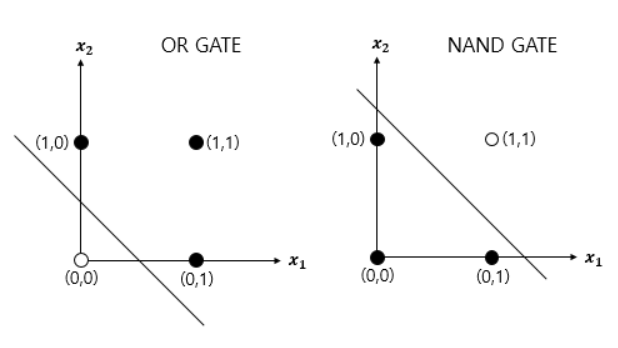

In [17]:
def NAND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([-0.5,-0.5]) # AND 와 부호만 변경
    b = 0.7 # AND 와 부호만 변경
    temp = np.sum(x*w) + b

    if temp > 0:
        return 1
    elif temp <= 0:
        return 0

print('입력 x1: 0  x2: 0,| 출력 y: %d' %NAND(0,0))
print('입력 x1: 1  x2: 0,| 출력 y: %d' %NAND(1,0))
print('입력 x1: 0  x2: 1,| 출력 y: %d' %NAND(0,1))
print('입력 x1: 1  x2: 1,| 출력 y: %d' %NAND(1,1))

입력 x1: 0  x2: 0,| 출력 y: 1
입력 x1: 1  x2: 0,| 출력 y: 1
입력 x1: 0  x2: 1,| 출력 y: 1
입력 x1: 1  x2: 1,| 출력 y: 0


OR 게이트 : 입력층 중에 1이 하나라도 있으면 1을 출력

|$x_1$|$x_2$|$y$|
|------|------|------|
|0|0|0|
|1|0|1|
|0|1|1|
|1|1|1|

In [20]:
def OR(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5]) # 
    b = -0.1 # 낮은 편향
    temp = np.sum(x*w) + b

    if temp > 0:
        return 1
    elif temp <= 0:
        return 0

print('입력 x1: 0  x2: 0,| 출력 y: %d' %OR(0,0))
print('입력 x1: 1  x2: 0,| 출력 y: %d' %OR(1,0))
print('입력 x1: 0  x2: 1,| 출력 y: %d' %OR(0,1))
print('입력 x1: 1  x2: 1,| 출력 y: %d' %OR(1,1))

입력 x1: 0  x2: 0,| 출력 y: 0
입력 x1: 1  x2: 0,| 출력 y: 1
입력 x1: 0  x2: 1,| 출력 y: 1
입력 x1: 1  x2: 1,| 출력 y: 1


#### 2.2.4 XOR 게이트

배타적 논리합 : $x_1, x_2$ 둘 중 하나만 1일때 1을 출력 즉 입력값이 서로 다를때만 1을 출력하는 구조

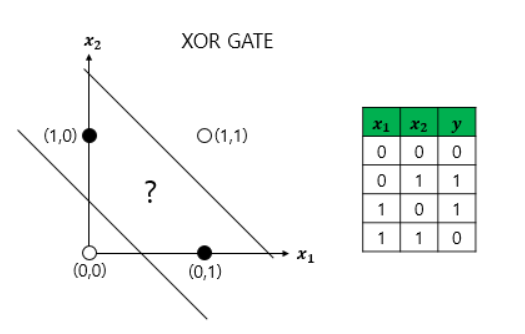

하나의 선만으로 검은색인 입력값이 서로 다른 값을 구분해 낼 수 없다. 따라서 곡선 또는 두개 이상의 선이 필요하게 된다.


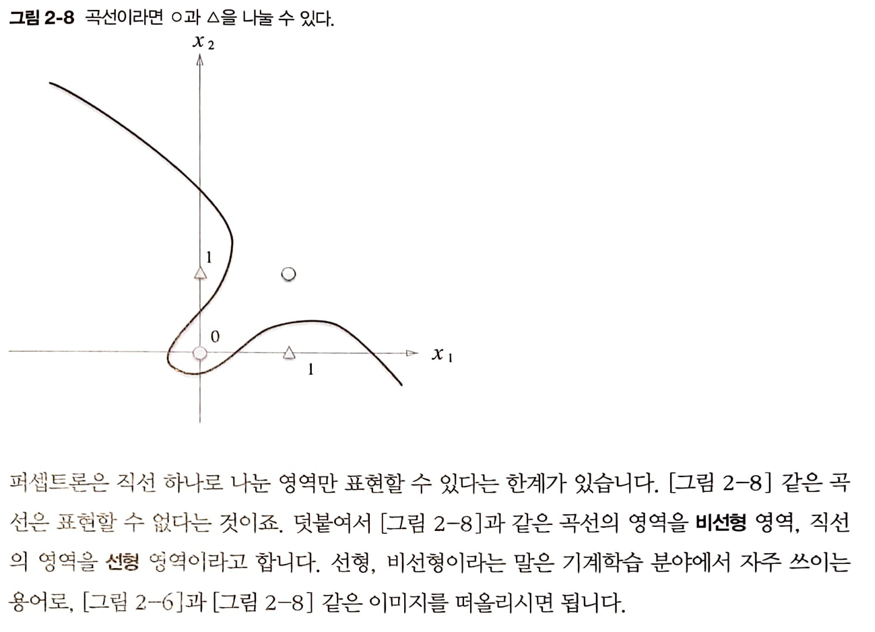

### 2.3 다층 퍼셉트론

퍼셉트론은 층을 쌓아 다층 퍼셉트론을 만들수 있다.

XOR 게이트는 AND, NAND, OR 게이트를 조합해서 만들 수 있다.

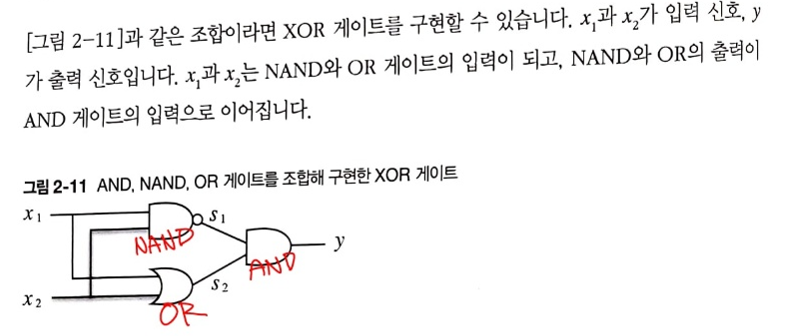

|$x_1$|$x_2$|$s_1$|$s_2$|$y$|
|------|------|------|------|------|
|0|0|1|0|0|
|1|0|1|1|1|
|0|1|1|1|1|
|1|1|0|1|0|


$x_1$과 $x_2$의 NAND게이트 출력을 $s_1$, OR게이트 출력을 $s_2$로 한다.  
$s_1$과 $s_2$의 AND게이트 출력을 뽑아보면 XOR 게이트가 완성된다.

In [25]:
def XOR(x1,x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = And(s1,s2)

    return y

print('입력 x1: 0  x2: 0,| 출력 y: %d' %XOR(0,0))
print('입력 x1: 1  x2: 0,| 출력 y: %d' %XOR(1,0))
print('입력 x1: 0  x2: 1,| 출력 y: %d' %XOR(0,1))
print('입력 x1: 1  x2: 1,| 출력 y: %d' %XOR(1,1))

입력 x1: 0  x2: 0,| 출력 y: 0
입력 x1: 1  x2: 0,| 출력 y: 1
입력 x1: 0  x2: 1,| 출력 y: 1
입력 x1: 1  x2: 1,| 출력 y: 0


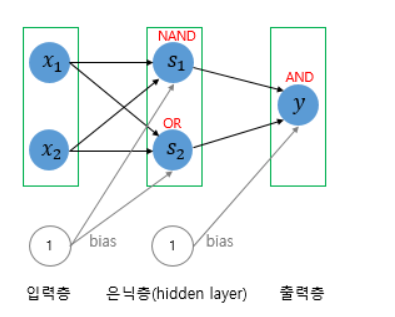

다층 퍼셉트론은 입력층과 출력층 사이에 **은닉층(hidden layer)**가 추가로 생성되게 된다.

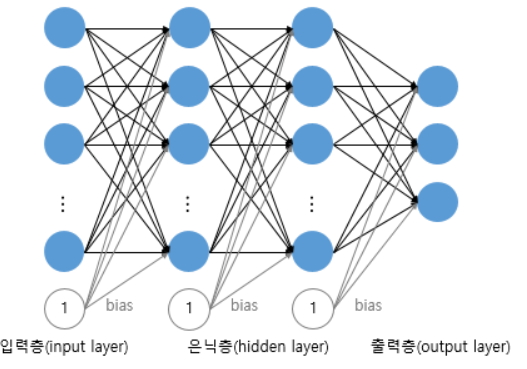

아래와 같이 여러층의 은닉층이 2개 이상인 신경망을 **심층 신경망(Deep Neural Network, DNN)**이라고 한다.

그리고 이 심층신경망에서 손실 함수(Loss function)와 옵티마이저(Optimizer)를 사용하여 가중치를 찾아내는 학습과정을 **딥 러닝(Deep Learning)**이라고 한다.

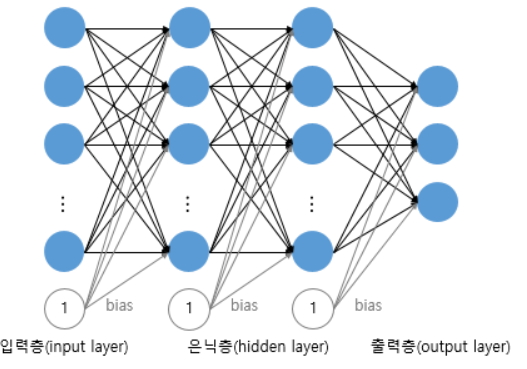